<a href="https://colab.research.google.com/github/GayathriGalli/umbc_data690_fall2024/blob/main/Mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 10 - Mini Project

Comparing the economy and wealth of G7 countries and BRICS countries.

Use http://g7brics.streamlit.app as the reference.

Make sure your check your calculation, aggregation, and visualization with the reference site for correctness.

For visualization, pay attention to details - color, label, information display.

## Step 1 - Import Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.express import choropleth
import plotly.express as px


## Step 2 - Load the input dataset

Download the individaul countries data from the reference site and upload it to your GitHub folder. Load the dataset directly from your GitHub.

In [2]:
url = "https://raw.githubusercontent.com/GayathriGalli/umbc_data690_fall2024/refs/heads/main/2024-11-07T00-25_export%20(1).csv"
df = pd.read_csv(url)


## Step 3 - Explore the input dataset

- Display number of rows and columns
- Dispaly at first 5 rows, last 5 rows, and random 5 rows.
- Display information about the dataset
- For all numerical variables, display their summary statistics
- For all categorical variables, display their number of categories and most frequent category
- Find out how many countries each region has.
- Display all countries that are Latin American & Caribbean.
- Find out how many countries each income level has.
- Display all countries that are of high income.


In [5]:

print("Number of rows and columns:", df.shape)



Number of rows and columns: (5208, 17)


In [6]:

print("\nFirst 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

print("\nRandom 5 rows:")
print(df.sample(5))




First 5 rows:
   Unnamed: 0  Year Country Code Country Name                      Region  \
0           0  2000          ABW        Aruba  Latin America & Caribbean    
1           1  2000          AFG  Afghanistan                  South Asia   
2           2  2000          AGO       Angola         Sub-Saharan Africa    
3           3  2000          ALB      Albania       Europe & Central Asia   
4           4  2000          AND      Andorra       Europe & Central Asia   

          Income Group    Lending Type  Military Expenditure ($Millions)  \
0          High income  Not classified                               NaN   
1           Low income             IDA                               NaN   
2  Lower middle income            IBRD                        583.621334   
3  Upper middle income            IBRD                         45.362503   
4          High income  Not classified                               NaN   

   Military Expenditure (% of GDP)  GDP ($Billions)  GDP PPP ($Bi

In [7]:

print("\nDataset Information:")
df.info()




Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5208 entries, 0 to 5207
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                5208 non-null   int64  
 1   Year                                      5208 non-null   int64  
 2   Country Code                              5208 non-null   object 
 3   Country Name                              5208 non-null   object 
 4   Region                                    5208 non-null   object 
 5   Income Group                              5208 non-null   object 
 6   Lending Type                              5208 non-null   object 
 7   Military Expenditure ($Millions)          3553 non-null   float64
 8   Military Expenditure (% of GDP)           3428 non-null   float64
 9   GDP ($Billions)                           4988 non-null   float64
 10  GDP PPP ($Bill

In [56]:

print("\nSummary Statistics for Numerical Variables:")
print(df.describe())





Summary Statistics for Numerical Variables:
        Unnamed: 0         Year  Military Expenditure ($Millions)  \
count  5208.000000  5208.000000                       3553.000000   
mean   2603.500000  2011.500000                       9692.743472   
std    1503.564432     6.922851                      53776.761846   
min       0.000000  2000.000000                          0.000000   
25%    1301.750000  2005.750000                        107.553688   
50%    2603.500000  2011.500000                        569.671622   
75%    3905.250000  2017.250000                       3625.564802   
max    5207.000000  2023.000000                     876943.200000   

       Military Expenditure (% of GDP)  GDP ($Billions)  GDP PPP ($Billions)  \
count                      3428.000000      4988.000000          4726.000000   
mean                          1.966078       325.507413           509.041065   
std                           1.772127      1491.780379          1940.946622   
min          

In [9]:

print("\nSummary Statistics for Categorical Variables:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(f"Number of Categories: {df[col].nunique()}")
    print(f"Most Frequent Category: {df[col].mode()[0]}")




Summary Statistics for Categorical Variables:

Column: Country Code
Number of Categories: 217
Most Frequent Category: ABW

Column: Country Name
Number of Categories: 217
Most Frequent Category: Afghanistan

Column: Region
Number of Categories: 7
Most Frequent Category: Europe & Central Asia

Column: Income Group
Number of Categories: 5
Most Frequent Category: High income

Column: Lending Type
Number of Categories: 4
Most Frequent Category: Not classified

Column: Group
Number of Categories: 3
Most Frequent Category: REST OF WORLD


In [10]:

print("\nNumber of Countries per Region:")
region_counts = df['Region'].value_counts()
print(region_counts)




Number of Countries per Region:
Region
Europe & Central Asia         1392
Sub-Saharan Africa            1152
Latin America & Caribbean     1008
East Asia & Pacific            888
Middle East & North Africa     504
South Asia                     192
North America                   72
Name: count, dtype: int64


In [11]:

print("\nCountries in Latin America & Caribbean:")
latin_american_countries = df[df['Region'] == 'Latin America & Caribbean']['Country Name']
print(latin_american_countries.to_list())




Countries in Latin America & Caribbean:
[]


In [12]:

print("\nNumber of Countries per Income Level:")
income_level_counts = df['Income Group'].value_counts()
print(income_level_counts)


Number of Countries per Income Level:
Income Group
High income            2040
Upper middle income    1296
Lower middle income    1224
Low income              624
Not classified           24
Name: count, dtype: int64


In [57]:
print("\nCountries in High Income Group:")
print(df[df['Income Group'] == 'High income']['Country Name'].unique())




Countries in High Income Group:
['Aruba' 'Andorra' 'United Arab Emirates' 'American Samoa'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Belgium' 'Bulgaria'
 'Bahrain' 'Bahamas, The' 'Bermuda' 'Barbados' 'Brunei Darussalam'
 'Canada' 'Switzerland' 'Channel Islands' 'Chile' 'Curacao'
 'Cayman Islands' 'Cyprus' 'Czechia' 'Germany' 'Denmark' 'Spain' 'Estonia'
 'Finland' 'France' 'Faroe Islands' 'United Kingdom' 'Gibraltar' 'Greece'
 'Greenland' 'Guam' 'Guyana' 'Hong Kong SAR, China' 'Croatia' 'Hungary'
 'Isle of Man' 'Ireland' 'Iceland' 'Israel' 'Italy' 'Japan'
 'St. Kitts and Nevis' 'Korea, Rep.' 'Kuwait' 'Liechtenstein' 'Lithuania'
 'Luxembourg' 'Latvia' 'Macao SAR, China' 'St. Martin (French part)'
 'Monaco' 'Malta' 'Northern Mariana Islands' 'New Caledonia' 'Netherlands'
 'Norway' 'Nauru' 'New Zealand' 'Oman' 'Panama' 'Palau' 'Poland'
 'Puerto Rico' 'Portugal' 'French Polynesia' 'Qatar' 'Romania'
 'Russian Federation' 'Saudi Arabia' 'Singapore' 'San Marino'
 'Slovak Republic' 'Sloven

## Step 4 - Categorize Each Country

Create a new column "Group". If a country is one of the seven G7 countried, the value of "Group" would be "G7", if a country of one of the five BRICS countries, the value of "Group" would be "BRICS". Otherwise, the value of "Group" would be "REST of WORLD".

In [14]:

G7_countries = ["United States", "Canada", "United Kingdom", "Germany", "France", "Italy", "Japan"]

BRICS_countries = ["Brazil", "Russia", "India", "China", "South Africa"]

def assign_group(country):
    if country in G7_countries:
        return "G7"
    elif country in BRICS_countries:
        return "BRICS"
    else:
        return "REST of WORLD"

df['Group'] = df['Country Name'].apply(assign_group)

print("Updated Dataset with 'Group' Column:")
print(df[['Country Name', 'Group']].head())


Updated Dataset with 'Group' Column:
  Country Name          Group
0        Aruba  REST of WORLD
1  Afghanistan  REST of WORLD
2       Angola  REST of WORLD
3      Albania  REST of WORLD
4      Andorra  REST of WORLD


## Step 5 - Aggregate Data

Aggregate the following columns at the "Group" level for each year:

- For GDP, using "sum" for aggregation.
- For GDP Per Capita, use "mean" for aggregation.
- Check your calculation with the reference site.

In [30]:

df_groupby_group = df.groupby(['Year', 'Group']).aggregate({
    'GDP ($Billions)': 'sum',
    'GDP Per Capita ($)': 'mean'
}).reset_index()

df_groupby_group.head()


,Year,Group,GDP ($Billions),GDP Per Capita ($)
0,2000,BRICS,2486.928163,2092.467207
1,2000,G7,22089.917915,27757.147971
2,2000,REST of WORLD,8901.873408,7547.718130
3,2001,BRICS,2520.254577,1878.182566
4,2001,G7,21836.921489,27121.012840


## Step 6 - Calculate Percentage Share of GDP

For each year, calculate the percentage share of each group's GDP. Check your calculation with the reference site.

In [33]:

total_gdp_per_year = df_groupby_group.groupby('Year')['GDP ($Billions)'].sum().reset_index()
total_gdp_per_year.rename(columns={'GDP ($Billions)': 'Total GDP ($Billions)'}, inplace=True)

df_groupby_group = df_groupby_group.merge(total_gdp_per_year, on='Year')

df_groupby_group['GDP Percentage Share (%)'] = (df_groupby_group['GDP ($Billions)'] / df_groupby_group['Total GDP ($Billions)']) * 100

print(df_groupby_group.head())


   Year          Group  GDP ($Billions)  GDP Per Capita ($)  \
0  2000          BRICS      2486.928163         2092.467207   
1  2000             G7     22089.917915        27757.147971   
2  2000  REST of WORLD      8901.873408         7547.718130   
3  2001          BRICS      2520.254577         1878.182566   
4  2001             G7     21836.921489        27121.012840   

   Total GDP ($Billions)_x  GDP Percentage Share (%)  Total GDP ($Billions)_y  \
0             33478.719486                  7.428385             33478.719486   
1             33478.719486                 65.981968             33478.719486   
2             33478.719486                 26.589647             33478.719486   
3             33298.243636                  7.568731             33298.243636   
4             33298.243636                 65.579800             33298.243636   

   Total GDP ($Billions)  
0           33478.719486  
1           33478.719486  
2           33478.719486  
3           33298.243636  

## Step 7 - Plot the GDP Percentage Share Over Time

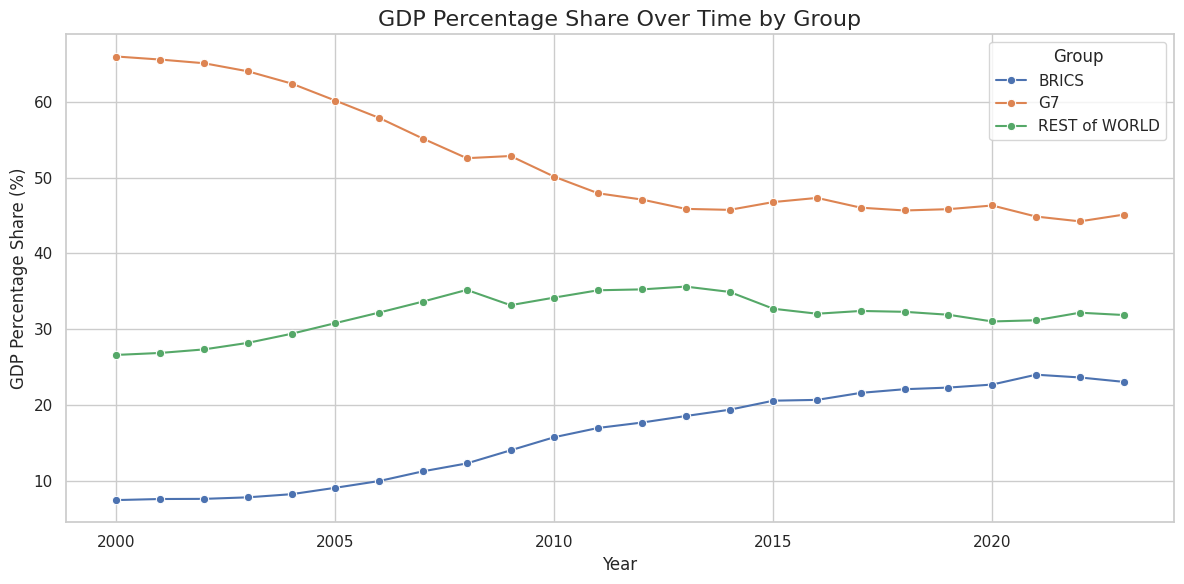

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_groupby_group, x='Year', y='GDP Percentage Share (%)', hue='Group', marker='o')

plt.title('GDP Percentage Share Over Time by Group', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP Percentage Share (%)', fontsize=12)

plt.legend(title='Group')
plt.tight_layout()
plt.show()


## Step 8 - Plot the Total GDP Over Time

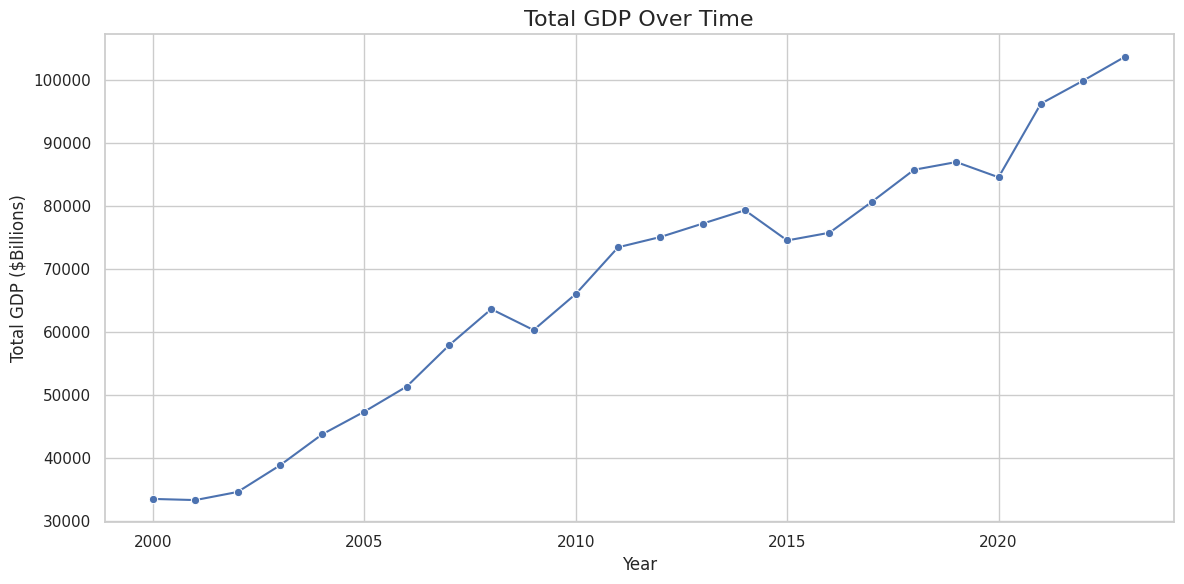

In [35]:

total_gdp_over_time = df_groupby_group.groupby('Year')['GDP ($Billions)'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=total_gdp_over_time, x='Year', y='GDP ($Billions)', marker='o')


plt.title('Total GDP Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total GDP ($Billions)', fontsize=12)

plt.tight_layout()
plt.show()


## Step 9 - Plot the 2023 GDP Pie Chart

Each group is a slice of a pie. Make sure the following information is displayed for each slice:

- Group Name
- GDP Percentage Share
- GDP Total

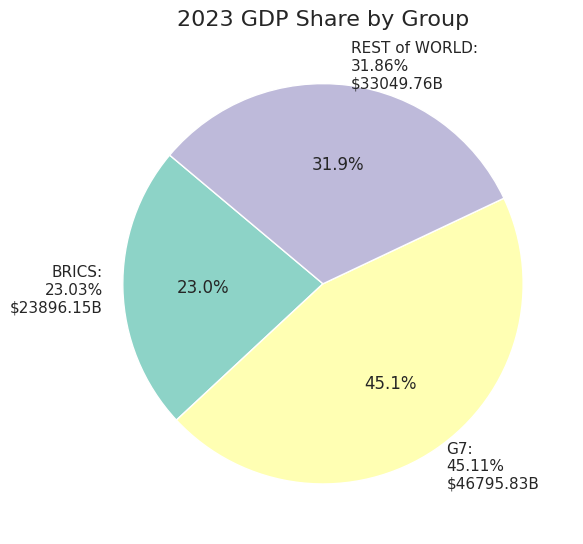

In [42]:

gdp_2023 = df_groupby_group[df_groupby_group['Year'] == 2023].copy()

gdp_2023.loc[:, 'Label'] = gdp_2023.apply(
    lambda row: f"{row['Group']}:\n{row['GDP Percentage Share (%)']:.2f}%\n${row['GDP ($Billions)']:.2f}B", axis=1
)
gdp_values_2023 = gdp_2023['GDP ($Billions)']
labels_2023 = gdp_2023['Label']

plt.figure(figsize=(6, 6))
plt.pie(gdp_values_2023, labels=labels_2023, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3", len(gdp_values_2023)))

plt.title('2023 GDP Share by Group', fontsize=16)

plt.tight_layout()
plt.show()




## Step 10 - Plot the 2023 GDP Pie Charts

One pie chart for G7 and one pie chart for BRICK. Each country is a slice of a pie. Make sure the following information is displayed for each slice:

- Country Name
- GDP Percentage Share
- GDP Total

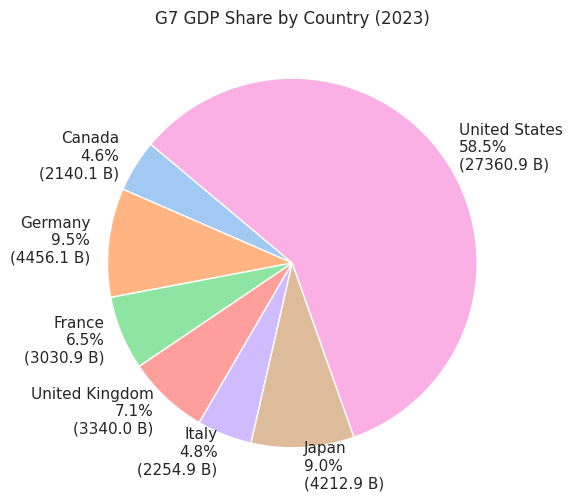

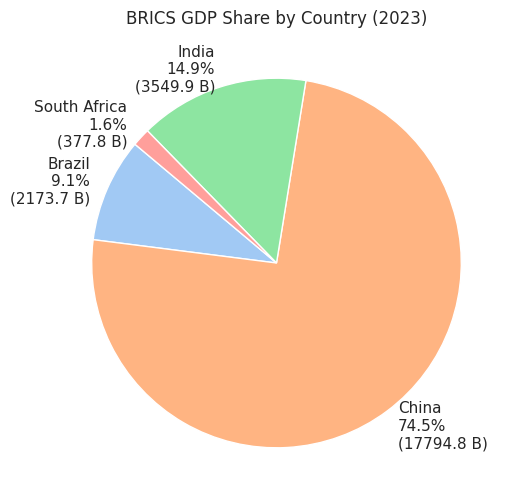

In [47]:

def plot_gdp_pie_chart(data, group_name):
    # Create a copy of the filtered data
    group_data = data[data['Group'] == group_name].copy()

    total_gdp = group_data['GDP ($Billions)'].sum()


    group_data['GDP_Share_Percentage'] = (group_data['GDP ($Billions)'] / total_gdp) * 100
    labels = group_data.apply(
        lambda row: f"{row['Country Name']}\n{row['GDP_Share_Percentage']:.1f}%\n({row['GDP ($Billions)']:.1f} B)", axis=1
    )


    plt.figure(figsize=(6, 6))
    plt.pie(
        group_data['GDP ($Billions)'], labels=labels, autopct=None, startangle=140, colors=sns.color_palette('pastel')
    )
    plt.title(f"{group_name} GDP Share by Country (2023)")
    plt.show()


plot_gdp_pie_chart(gdp_2023_groups, "G7")
plot_gdp_pie_chart(gdp_2023_groups, "BRICS")


## Step 11 - Plot the 2023 GDP Sun Burst Chart

Showing the hierarchy of Group and Country.

In [48]:
import plotly.express as px

gdp_2023_groups = df[(df['Year'] == 2023) & (df['Group'].isin(['G7', 'BRICS']))]

gdp_2023_groups = gdp_2023_groups[['Group', 'Country Name', 'GDP ($Billions)']]

fig = px.sunburst(
    gdp_2023_groups,
    path=['Group', 'Country Name'],
    values='GDP ($Billions)',
    title="2023 GDP Sunburst Chart by Group and Country"
)

fig.show()


## Step 12 - Plot the 2023 GDP Tree Map Chart

Showing the hierarchy of Group and Country.

In [49]:
import plotly.express as px


gdp_2023_groups = df[(df['Year'] == 2023) & (df['Group'].isin(['G7', 'BRICS']))]

gdp_2023_groups = gdp_2023_groups[['Group', 'Country Name', 'GDP ($Billions)']]

fig = px.treemap(
    gdp_2023_groups,
    path=['Group', 'Country Name'],
    values='GDP ($Billions)',
    title="2023 GDP Tree Map by Group and Country"
)

fig.show()


## Step 13 - Plot the Historic Trend of GDP Per Capita

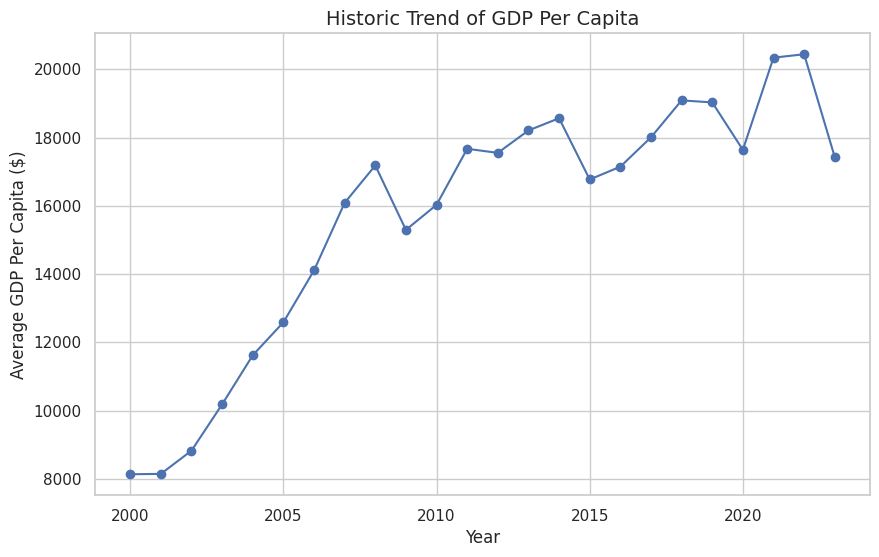

In [50]:
import matplotlib.pyplot as plt
gdp_per_capita_trend = df.groupby('Year')['GDP Per Capita ($)'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(gdp_per_capita_trend['Year'], gdp_per_capita_trend['GDP Per Capita ($)'], marker='o', linestyle='-', color='b')

plt.title("Historic Trend of GDP Per Capita", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average GDP Per Capita ($)", fontsize=12)
plt.grid(True)

plt.show()


## Step 14 - Plot the 2023 GDP Per Capita Bar Chart

Each group is a bar.

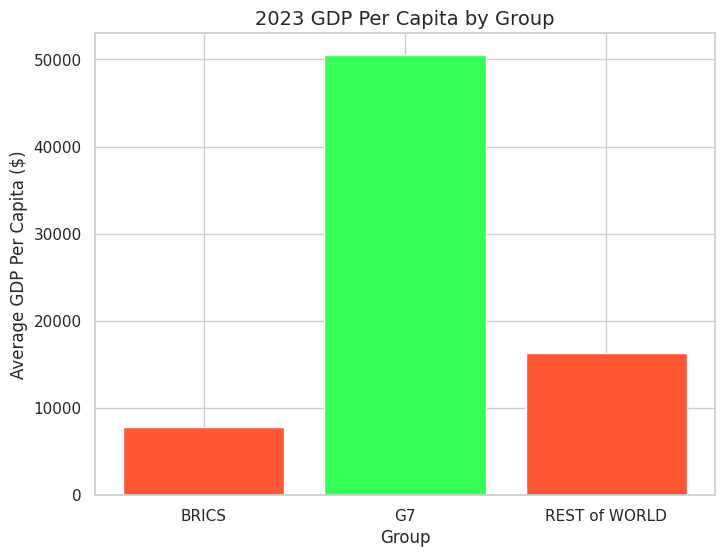

In [51]:

gdp_2023 = df[df['Year'] == 2023]

gdp_2023_grouped = gdp_2023.groupby('Group')['GDP Per Capita ($)'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(gdp_2023_grouped['Group'], gdp_2023_grouped['GDP Per Capita ($)'], color=['#FF5733', '#33FF57'])

plt.title("2023 GDP Per Capita by Group", fontsize=14)
plt.xlabel("Group", fontsize=12)
plt.ylabel("Average GDP Per Capita ($)", fontsize=12)
plt.grid(True, axis='y')

plt.show()


## Step 15 - Plot the 2023 GDP Per Capita Bar Chart of G7 and BRICS countries

Each country is a bar. Differentiate group by color.

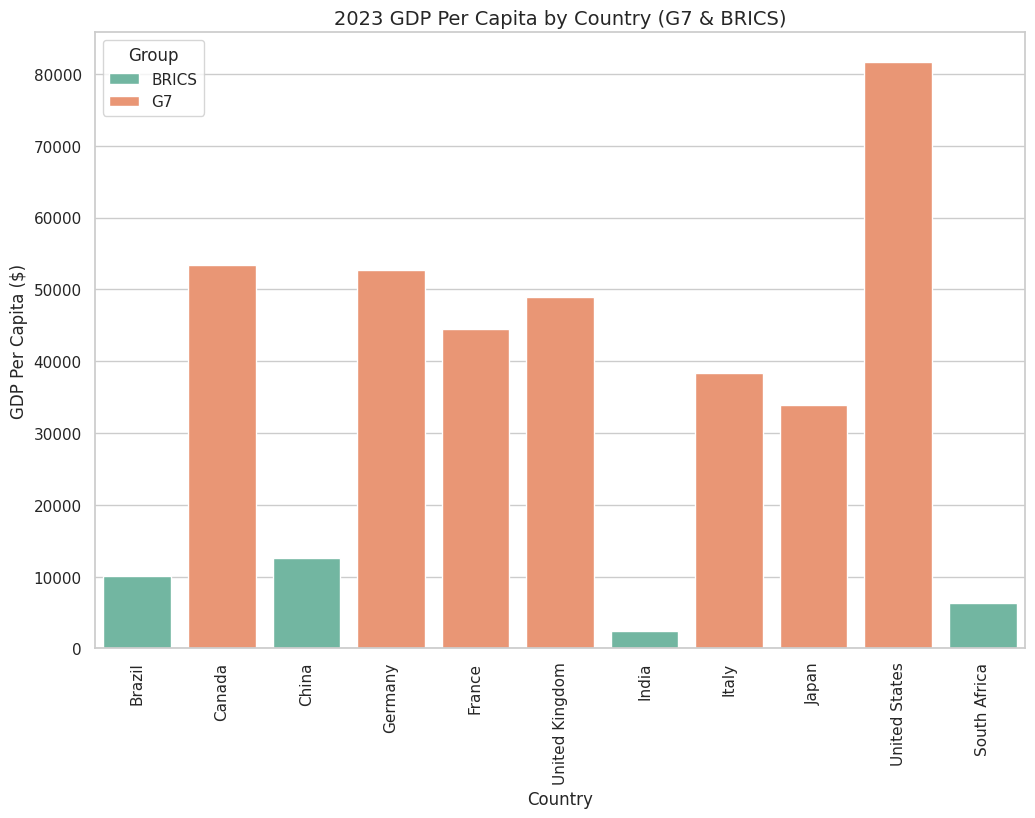

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

gdp_2023_groups = df[(df['Year'] == 2023) & (df['Group'].isin(['G7', 'BRICS']))]

plt.figure(figsize=(12, 8))
sns.barplot(
    x='Country Name',
    y='GDP Per Capita ($)',
    data=gdp_2023_groups,
    hue='Group',
    palette='Set2'
)

plt.title("2023 GDP Per Capita by Country (G7 & BRICS)", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("GDP Per Capita ($)", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Group')
plt.grid(True, axis='y')

plt.show()


## Step 16 - Create a Choropleth

To show G7 countries and BRICS countries and use color code to differentiate the two broups.

In [55]:
fig = px.choropleth(df[df['Group'].isin(['G7', 'BRICS'])], locations="Country Name", color="Group",
                    locationmode="country names", title="G7 and BRICS Countries Choropleth",
                    color_discrete_map={"G7": "blue", "BRICS": "red"})
fig.show()